In [ ]:
#Dataset: "Alphabets_data.csv"
#The dataset provided, "Alphabets_data.csv", consists of labeled data suitable for a classification task aimed at identifying different alphabets. Before using this data in your model, you'll need to preprocess it to ensure optimal performance.
#Tasks
1. Data Exploration and Preprocessing
Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.
Execute necessary data preprocessing steps including data normalization, managing missing values.
2. Model Implementation
Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.
Divide the dataset into training and test sets.
Train your model on the training set and then use it to make predictions on the test set.
3. Hyperparameter Tuning
Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.
Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.
4. Evaluation
Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.
Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.



In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Alphabets_data.csv')

# Display the first few rows of the dataset
data.head()

# Summary of the dataset
#print(data.info())

# Summary statistics
#print(data.describe())

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [18]:
print(data.isnull().sum())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [19]:
data.dropna(inplace=True)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = data.drop('letter', axis=1)  # Replace 'target' with the actual name of your label column
normalized_features = scaler.fit_transform(features)

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(data['letter'])  # Replace 'target' with the actual name of your label column

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(normalized_features, y_encoded, test_size=0.2, random_state=42)

# Construct the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 128 neurons
model.add(Dense(64, activation='relu'))  # Additional hidden layer with 64 neurons
model.add(Dense(len(set(y_encoded)), activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,122 (47.35 KB)

 Trainable params: 12,122 (47.35 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2435 - loss: 2.8345 - val_accuracy: 0.5119 - val_loss: 1.6457
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5524 - loss: 1.5330 - val_accuracy: 0.6375 - val_loss: 1.3291
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6484 - loss: 1.2586 - val_accuracy: 0.6837 - val_loss: 1.1598
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6815 - loss: 1.1437 - val_accuracy: 0.7094 - val_loss: 1.0845
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7183 - loss: 1.0180 - val_accuracy: 0.7225 - val_loss: 1.0339
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7339 - loss: 0.9750 - val_accuracy: 0.7325 - val_loss: 0.9633
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7539 - loss: 0.8961 - val_accuracy: 0.7369 - val_loss: 0.9095
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7634 - loss: 0.8524 - val_accu

In [25]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1960
Test Accuracy: 93.67%


In [27]:
# Make predictions
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


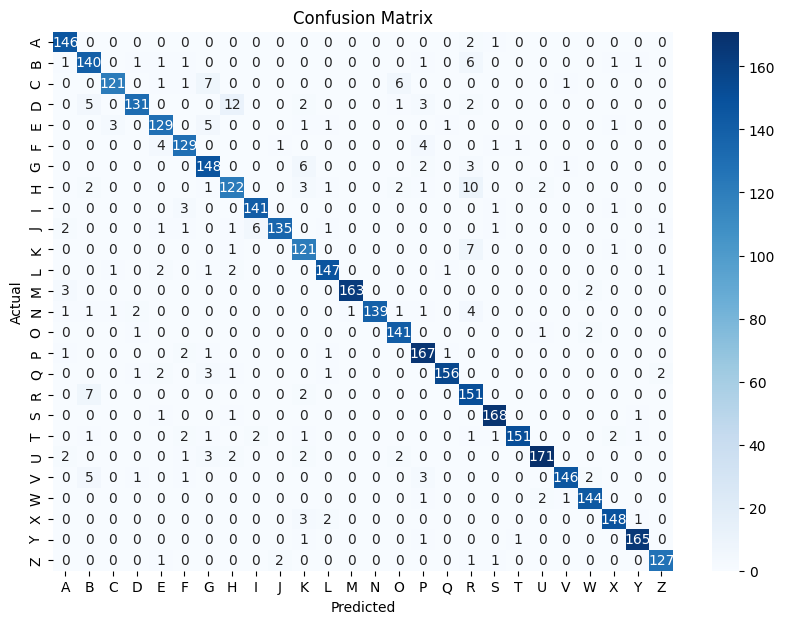

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Assuming we have the normalized features X and encoded labels y_encoded

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(normalized_features, y_encoded, test_size=0.2, random_state=42)

# Construct the default ANN model
default_model = Sequential()
default_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer
default_model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer
# Compile the model
default_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
default_history = default_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the default model
default_predictions = np.argmax(default_model.predict(X_test), axis=1)

# Evaluate performance
default_accuracy = accuracy_score(y_test, default_predictions)
default_class_report = classification_report(y_test, default_predictions)

print("Default Model Accuracy: ", default_accuracy)
print("Default Model Classification Report:\n", default_class_report)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1508 - loss: 3.1259 - val_accuracy: 0.4588 - val_loss: 2.5282
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4755 - loss: 2.3442 - val_accuracy: 0.5444 - val_loss: 1.9001
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5656 - loss: 1.8261 - val_accuracy: 0.5831 - val_loss: 1.6161
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6134 - loss: 1.5699 - val_accuracy: 0.6369 - val_loss: 1.4549
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6399 - loss: 1.4365 - val_accuracy: 0.6438 - val_loss: 1.3539
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6556 - loss: 1.3286 - val_accuracy: 0.6750 - val_loss: 1.2677
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6734 - loss: 1.2531 - val_accuracy: 0.6856 - val_loss: 1.2078
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6956 - loss: 1.1839 - val_accuracy: 0.6850

In [35]:
!pip install -q keras-tuner  # Run this only if keras-tuner is not installed

import kerastuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=128, step=32),
                    activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))

    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=50,
                     factor=3, directory='my_dir', project_name='intro_to_kt')

tuner.search(X_train, y_train, epochs=50, validation_split=0.1)

best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the tuned model
tuned_predictions = np.argmax(best_model.predict(X_test), axis=1)
tuned_accuracy = accuracy_score(y_test, tuned_predictions)
tuned_class_report = classification_report(y_test, tuned_predictions)

print("Tuned Model Accuracy: ", tuned_accuracy)
print("Tuned Model Classification Report:\n", tuned_class_report)

Trial 8 Complete [00h 00m 04s]
val_accuracy: 0.5724999904632568

Best val_accuracy So Far: 0.5975000262260437
Total elapsed time: 00h 00m 34s
  1/125 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Tuned Model Accuracy:  0.60275
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       149
           1       0.45      0.58      0.51       153
           2       0.66      0.66      0.66       137
           3       0.70      0.54      0.61       156
           4       0.56      0.62      0.59       141
           5       0.46      0.74      0.57       140
           6       0.78      0.36      0.50       160
           7       0.16      0.11      0.13       144
           8       0.77      0.80      0.79       146
           9       0.58      0.74      0.65       149
          10       0.41      0.45      0.43       130
          11       0.99      0.74      0.84       155
          12       0.64      0.92      0.75       168
          13       0.66      0.23      0.34       151
          14       0.68      0.53      0.60       145
          15       0.85    